In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
import time
import datetime
import collections

In [2]:
# -------------------------------------------------------------RESAMPLING OF TRAINING DATA-----------------------------------------------------
# ----------------------------------------------------------(UNBALANCED TRAINING SET)-----------------------------------------------------------
# df = pd.read_csv(r"train.csv")
# # df = df[:10]
# for index, row in df.iterrows():
#     if row['accepted']==1:
#       df = df.append(row)
#       df = df.append(row)
# df.to_csv('trainmore.csv', index=False, encoding='utf-8')
# # df

In [3]:
# -------------------------------------------------------------IMPORTING TRAINING DATA----------------------------------------------------------
df = pd.read_csv(r"trainmore.csv")
df.dropna()
df.set_index('id', inplace=True)
# df.reset_index(inplace=True)
df = df.drop(columns=['blood_group'])
df = df.drop(columns=['mother_age'])
df = df.drop(columns=['father_age'])
# df = df.drop(columns=['Age'])
df = df[:220000]

# -------------------------------------------------------------IMPORTING TEST DATA----------------------------------------------------------

dftest = pd.read_csv(r"test.csv")
dftest.dropna()
dftest.set_index('id', inplace=True)
dftest = dftest.drop(columns=['blood_group'])
dftest = dftest.drop(columns=['mother_age'])
dftest = dftest.drop(columns=['father_age'])
# df = df.drop(columns=['female'])
# dftest = dftest.drop(columns=['Age'])

In [4]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,accepted
id,,,,,,,,,,,
223723,Female,23,1,18.0,1,< 1 Year,No,29223.0,152.0,89,0
102674,Male,44,1,23.0,0,1-2 Year,Yes,28501.0,26.0,111,1
15567,Male,23,1,41.0,0,< 1 Year,Yes,32590.0,152.0,71,0
222937,Male,78,1,15.0,1,1-2 Year,No,2630.0,14.0,245,0
32565,Female,25,1,44.0,1,< 1 Year,No,31821.0,152.0,59,0
...,...,...,...,...,...,...,...,...,...,...,...
248180,Female,27,1,46.0,1,< 1 Year,No,27537.0,152.0,14,0
394400,Female,21,1,41.0,1,1-2 Year,No,65475.0,124.0,36,0
376173,Male,28,1,12.0,1,< 1 Year,No,32694.0,152.0,79,0


In [5]:
# ----------------------------------------------------TRAIN DATA FEATURE PROCESSING---------------------------------------------
# one_hot = pd.get_dummies(df['blood_group'])
# df = df.drop('blood_group',axis = 1)
# df = df.join(one_hot)

one_hot = pd.get_dummies(df['Gender'])
df = df.drop('Gender',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['Vehicle_Age'])
df = df.drop('Vehicle_Age',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['Vehicle_Damage'])
df = df.drop('Vehicle_Damage',axis = 1)
df = df.join(one_hot)

df['Age']=((df['Age']-df['Age'].min())/(df['Age'].max()-df['Age'].min()))
df['Region_Code']=((df['Region_Code']-df['Region_Code'].min())/(df['Region_Code'].max()-df['Region_Code'].min()))
df['Annual_Premium']=((df['Annual_Premium']-df['Annual_Premium'].min())/(df['Annual_Premium'].max()-df['Annual_Premium'].min()))*100
df['Policy_Sales_Channel']=((df['Policy_Sales_Channel']-df['Policy_Sales_Channel'].min())/(df['Policy_Sales_Channel'].max()-df['Policy_Sales_Channel'].min()))*100
df['Vintage']=((df['Vintage']-df['Vintage'].min())/(df['Vintage'].max()-df['Vintage'].min()))
# df['mother_age']=((df['mother_age']-df['mother_age'].min())/(df['mother_age'].max()-df['mother_age'].min()))/1000
# df['father_age']=((df['father_age']-df['father_age'].min())/(df['father_age'].max()-df['father_age'].min()))/1000

# ----------------------------------------------------TEST DATA FEATURE PROCESSING---------------------------------------------
# one_hot = pd.get_dummies(dftest['blood_group'])
# dftest = dftest.drop('blood_group',axis = 1)
# dftest = dftest.join(one_hot)

one_hot = pd.get_dummies(dftest['Gender'])
dftest = dftest.drop('Gender',axis = 1)
dftest = dftest.join(one_hot)

one_hot = pd.get_dummies(dftest['Vehicle_Age'])
dftest = dftest.drop('Vehicle_Age',axis = 1)
dftest = dftest.join(one_hot)

one_hot = pd.get_dummies(dftest['Vehicle_Damage'])
dftest = dftest.drop('Vehicle_Damage',axis = 1)
dftest = dftest.join(one_hot)


dftest['Age']=((dftest['Age']-dftest['Age'].min())/(dftest['Age'].max()-dftest['Age'].min()))
dftest['Region_Code']=((dftest['Region_Code']-dftest['Region_Code'].min())/(dftest['Region_Code'].max()-dftest['Region_Code'].min()))
dftest['Annual_Premium']=((dftest['Annual_Premium']-dftest['Annual_Premium'].min())/(dftest['Annual_Premium'].max()-dftest['Annual_Premium'].min()))*100
dftest['Policy_Sales_Channel']=((dftest['Policy_Sales_Channel']-dftest['Policy_Sales_Channel'].min())/(dftest['Policy_Sales_Channel'].max()-dftest['Policy_Sales_Channel'].min()))*100
dftest['Vintage']=((dftest['Vintage']-dftest['Vintage'].min())/(dftest['Vintage'].max()-dftest['Vintage'].min()))
# dftest['mother_age']=((dftest['mother_age']-dftest['mother_age'].min())/(dftest['mother_age'].max()-dftest['mother_age'].min()))/1000
# dftest['father_age']=((dftest['father_age']-dftest['father_age'].min())/(dftest['father_age'].max()-dftest['father_age'].min()))/1000

df = df.drop(columns=['Female'], axis=1)
dftest = dftest.drop(columns=['Female'], axis=1)
df = df.drop(columns=['No'], axis=1)
dftest = dftest.drop(columns=['No'], axis=1)
df = df.drop(columns=['> 2 Years'], axis=1)
dftest = dftest.drop(columns=['> 2 Years'], axis=1)

In [6]:
df

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,accepted,Male,1-2 Year,< 1 Year,Yes
id,,,,,,,,,,,,
223723,0.046154,1,0.346154,1,4.947213,93.209877,0.273356,0,0,0,1,0
102674,0.369231,1,0.442308,0,4.812896,15.432099,0.349481,1,1,1,0,1
15567,0.046154,1,0.788462,0,5.573591,93.209877,0.211073,0,1,0,1,1
222937,0.892308,1,0.288462,1,0.000000,8.024691,0.813149,0,1,1,0,0
32565,0.076923,1,0.846154,1,5.430530,93.209877,0.169550,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
248180,0.107692,1,0.884615,1,4.633559,93.209877,0.013841,0,0,0,1,0
394400,0.015385,1,0.788462,1,11.691332,75.925926,0.089965,0,0,1,0,0
376173,0.123077,1,0.230769,1,5.592938,93.209877,0.238754,0,1,0,1,0


In [7]:
# -------------------------------------------------KNN------------------------------------------------------
from sklearn.model_selection import train_test_split
# from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

from sklearn.neighbors import KNeighborsClassifier
X = df.drop('accepted', axis=1)
y = df['accepted']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

neigh = KNeighborsClassifier()
neigh.fit(X, y)
# print(neigh.predict([[1.1]]))
y_predict = neigh.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_predict, average='macro')

0.6987834476435694

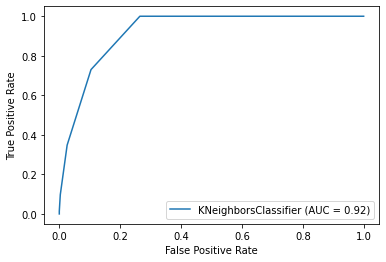

In [10]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection;
metrics.plot_roc_curve(neigh, X_test, y_test)  # doctest: +SKIP
plt.show() # KNN

In [ ]:
# -----------------------------------------------KNN SAVE SAMPLE-------------------------------------------
X_train = df.drop('accepted', axis=1)
y_train = df['accepted']
X_test = dftest
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)

from numpy import asarray
from numpy import savetxt
savetxt('knn3new.csv', y_predict.astype(int), fmt='%i', delimiter=',')
# dftest.shape
# y_predict.size

In [11]:
# -------------------------------------------------NAIVE BAYES------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = df.drop('accepted', axis=1)
y = df['accepted']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.6198895280073038

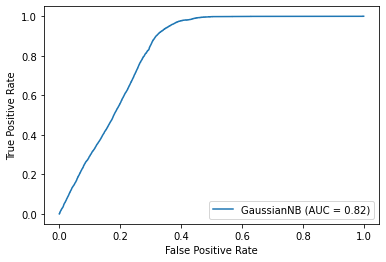

In [12]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection;
metrics.plot_roc_curve(gnb, X_test, y_test)  # doctest: +SKIP
plt.show() #GaussianNB

In [ ]:
# -----------------------------------------------SAVE SAMPLE-----------------------------------------------
X_train = df.drop('accepted', axis=1)
y_train = df['accepted']
X_test = dftest

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
from numpy import asarray
from numpy import savetxt

savetxt('GNB.csv', y_pred.astype(int), fmt='%i', delimiter=',')

In [ ]:
# ----------------------------------------------SVM (NOT WORKING)---------------------------------------------

from sklearn import svm
from sklearn.model_selection import train_test_split
# df.dropna()
X = df.drop('accepted', axis=1)
y = df['accepted']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

clf = svm.SVC()
clf.fit(X_train, y_train)
y_1 = clf.predict(X_test)

from sklearn.metrics import f1_score
f1_score(y_test, y_1, average='macro')
# df.shape

In [13]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# from sklearn.metrics import f1_score
# X, y = make_classification(n_samples=1000, n_features=4,
# ...                            n_informative=2, n_redundant=0,
# ...                            random_state=0, shuffle=False)
# for i in range(1, 30):
# clf = RandomForestClassifier(random_state=0, max_depth=25)
# clf.fit(X_train, y_train)
# y_1 = clf.predict(X_test)
# print("max_depth = ", i, " ", f1_score(y_test, y_1, average='macro'))

# -------------------------------------------------DECISION TREES--------------------------------------------

from sklearn.model_selection import train_test_split
X = df.drop('accepted', axis=1)
y = df['accepted']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_leaf=3)
clf = clf.fit(X_train, y_train)
# tree.plot_tree(clf)
y_pred = clf.predict(X_test)

In [14]:
# ------------------------------------------MAKING CONFUSION MATRIX----------------------------------------
from sklearn.metrics import confusion_matrix
y_true = y_test
print(confusion_matrix(y_true, y_pred))
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

[[43929  4350]
 [ 4867  1854]]


0.595969337154317

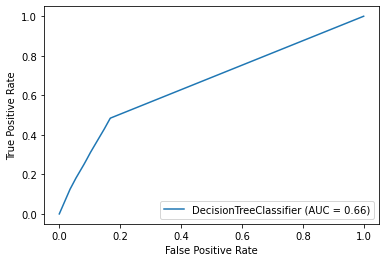

In [15]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection;
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
plt.show() # Decision Tree

In [ ]:
# -------------------------------------------DECISION TREE SAVE SAMPLE---------------------------------------

X_train = df.drop('accepted', axis=1)
y_train = df['accepted']
X_test = dftest
# clf = RandomForestClassifier(random_state=0, max_depth=15, max_features="log2")
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
# clf.fit(X_train, y_train)
y_1 = clf.predict(X_test)
# from sklearn.metrics import f1_score
# f1_score(y_test, y_1, average='macro')

from numpy import asarray
from numpy import savetxt

savetxt('DTcheck22.csv', y_1.astype(int), fmt='%i', delimiter=',')